In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('./train.csv')

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data = np.array(data)       # Converts the data into a NumPy array, allowing for efficient numerical operations
m, n = data.shape           # Gets the dimensions of the data (m = number of rows, n = number of columns)
np.random.shuffle(data)     # Shuffles the data randomly to avoid any bias or overfitting during training

data_dev = data[0:1000].T   # Selects the first 1000 rows from the data and transposes it (changes rows to columns)
Y_dev = data[0]             # Selects the first row of data as the target variable (Y) for development set
X_dev = data[1: n]          # Selects the remaining rows as the features (X) for the development set
X_dev = X_dev / 255.0       


data_train = data[1000: m].T  # Selects the remaining data (from row 1000 to m) and transposes it for the training set
Y_train = data_train[0]     # Selects the first row of the transposed training data as the target variable (Y)
X_train = data_train[1: n]  # Selects the remaining rows of the transposed training data as the features (X)
X_train = X_train / 255.0

In [5]:
X_train[:, 0].shape 

(784,)

In [6]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    expZ = np.exp(Z - np.max(Z, axis=0, keepdims=True))  # Subtract max for numerical stability
    return expZ / np.sum(expZ, axis=0, keepdims=True)
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [7]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [8]:
# Example Usage (assuming X_train and Y_train are preloaded and normalized):
# X_train: (784, number of samples), Y_train: (number of samples,)
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[1 5 1 ... 1 6 1] [2 3 3 ... 5 2 7]
0.047878048780487806
Iteration:  10
[8 5 8 ... 3 8 0] [2 3 3 ... 5 2 7]
0.18934146341463415
Iteration:  20
[8 6 8 ... 3 8 0] [2 3 3 ... 5 2 7]
0.2567560975609756
Iteration:  30
[8 6 8 ... 3 8 0] [2 3 3 ... 5 2 7]
0.3055121951219512
Iteration:  40
[8 6 9 ... 6 8 0] [2 3 3 ... 5 2 7]
0.3658292682926829
Iteration:  50
[8 5 1 ... 8 8 7] [2 3 3 ... 5 2 7]
0.4784390243902439
Iteration:  60
[8 3 1 ... 8 2 7] [2 3 3 ... 5 2 7]
0.5232682926829268
Iteration:  70
[8 3 1 ... 8 2 7] [2 3 3 ... 5 2 7]
0.557609756097561
Iteration:  80
[8 3 1 ... 8 2 7] [2 3 3 ... 5 2 7]
0.5903658536585366
Iteration:  90
[8 3 1 ... 8 2 7] [2 3 3 ... 5 2 7]
0.620780487804878
Iteration:  100
[8 3 3 ... 8 2 7] [2 3 3 ... 5 2 7]
0.6468048780487805
Iteration:  110
[8 3 3 ... 8 2 7] [2 3 3 ... 5 2 7]
0.6689512195121952
Iteration:  120
[8 3 3 ... 8 2 7] [2 3 3 ... 5 2 7]
0.6882682926829268
Iteration:  130
[8 3 3 ... 8 2 7] [2 3 3 ... 5 2 7]
0.7049268292682926
Iteration:  140


In [9]:
# 85% Accuracy

In [10]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [8]
Label:  2


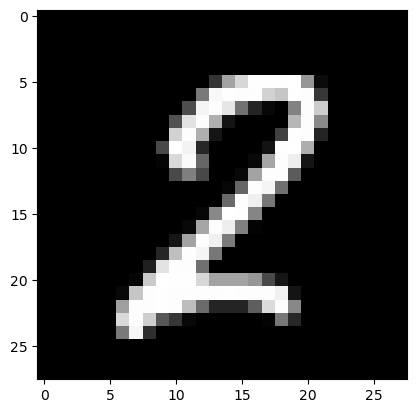

Prediction:  [3]
Label:  3


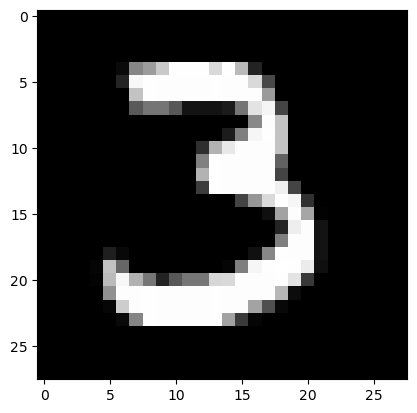

Prediction:  [3]
Label:  3


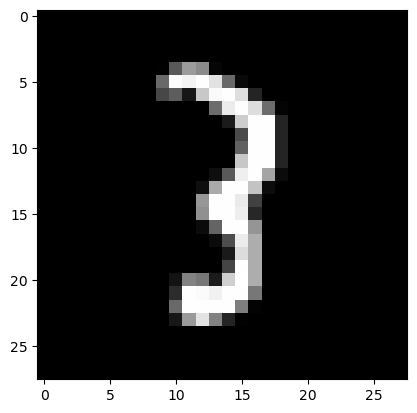

Prediction:  [0]
Label:  0


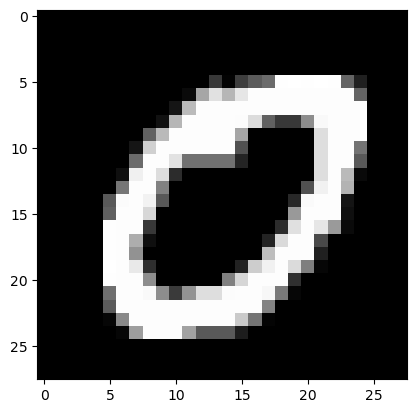

In [11]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)